In [1]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# %pip install kagglehub 
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

d:\Programming\Dog-Cats_Project-in-deep-leraning\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1


In [3]:
import os
# List files in the dataset directory
print("Files in the dataset directory:",os.listdir(path))

Files in the dataset directory: ['dogs_vs_cats', 'test', 'train']


In [4]:

base_dir = r'C:\Users\sande\.cache\kagglehub\datasets\salader\dogs-vs-cats\versions\1'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

print("Train dir exists?", os.path.exists(train_dir))
print("Test dir exists?", os.path.exists(test_dir))
print("Example train files:", os.listdir(train_dir)[:5])


Train dir exists? True
Test dir exists? True
Example train files: ['cats', 'dogs']


In [5]:
print("Train dir exists?", os.path.exists(train_dir))
print("Test dir exists?", os.path.exists(test_dir))
# print("Example train files:", os.listdir(train_dir)[:5])


Train dir exists? True
Test dir exists? True


In [6]:
train_dir

'C:\\Users\\sande\\.cache\\kagglehub\\datasets\\salader\\dogs-vs-cats\\versions\\1\\train'

In [7]:
test_dir

'C:\\Users\\sande\\.cache\\kagglehub\\datasets\\salader\\dogs-vs-cats\\versions\\1\\test'

In [8]:
# %pip install tensorflow
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import shutil
import random

In [9]:
## Generator

train_ds=keras.utils.image_dataset_from_directory(
    train_dir ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    )

val_ds=keras.utils.image_dataset_from_directory(
    test_dir ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#That image os numpy array so we want to convert it to normalized float32
def process(image, label):
    image = tensorflow.cast(image, tensorflow.float32) / 255.0  # Normalize to [0,1]
    return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [11]:
#Create CNN Model
model =Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='valid',input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),


    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.1),  # Dropout layer to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

d:\Programming\Dog-Cats_Project-in-deep-leraning\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
                metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,
            epochs=10,
          validation_data=val_ds,)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 281s 449ms/step - accuracy: 0.6081 - loss: 0.6612 - val_accuracy: 0.7226 - val_loss: 0.5684
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 388ms/step - accuracy: 0.7452 - loss: 0.5170 - val_accuracy: 0.7676 - val_loss: 0.4839
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 370ms/step - accuracy: 0.7999 - loss: 0.4328 - val_accuracy: 0.7986 - val_loss: 0.4436
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 235s 375ms/step - accuracy: 0.8483 - loss: 0.3384 - val_accuracy: 0.7802 - val_loss: 0.5487
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 393s 628ms/step - accuracy: 0.9127 - loss: 0.2148 - val_accuracy: 0.7816 - val_loss: 0.6620
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 391s 624ms/step - accuracy: 0.9520 - loss: 0.1363 - val_accuracy: 0.8026 - val_loss: 0.7023
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 373s 597ms/step - accuracy: 0.9699 - loss: 0.0850 - val_accuracy: 0.7856 - val_loss: 0.8864
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 606ms/step - accuracy: 0.9783 -

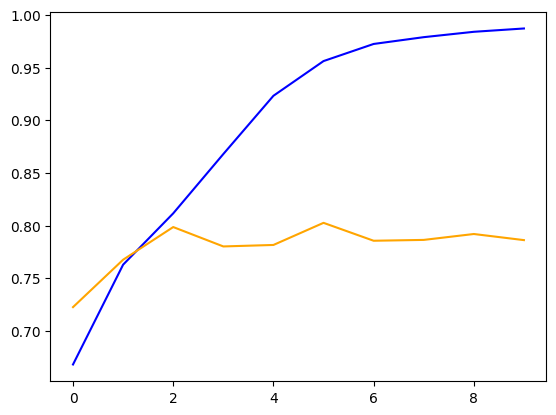

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='orange')

In [16]:
# %pip install opencv-python
import cv2
test_img= cv2.imread('First-Project\cat.jpg')
 


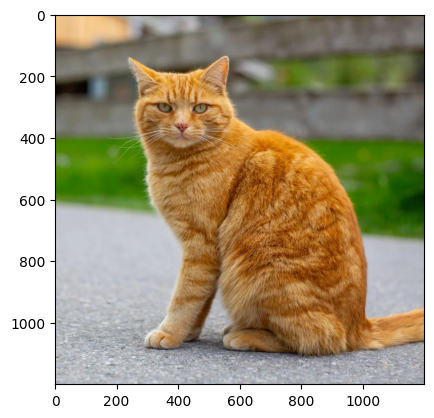

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("cat.jpg")
test_img = np.array(img)

plt.imshow(test_img)  # optional
plt.show()


In [18]:
# test_img.shapetest_img
test_img = cv2.resize(test_img, (256, 256))  #

In [19]:
test_img=test_img.reshape(1, 256,  256, 3)  # Reshape for model input

In [20]:
model.predict(test_img)  # Predict the class of the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


array([[0.]], dtype=float32)

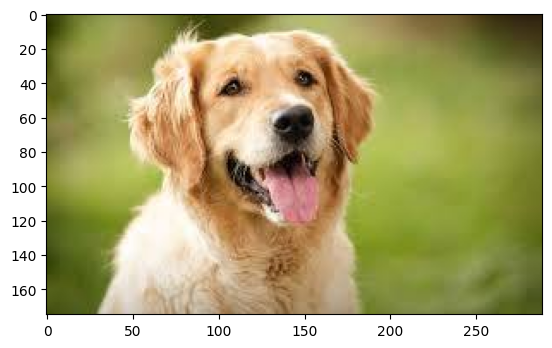

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("dog.jpg")
one_img = np.array(img)

plt.imshow(one_img)  # optional
plt.show()


In [22]:
one_img = cv2.resize(one_img, (256, 256))
one_img=one_img.reshape(1, 256, 256, 3) 
model.predict(one_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[1.]], dtype=float32)